> # **6조 _  < 이커머스 > 분야**

- 백병규
- 유재은
- 이다현
- 이은지

> # **[ 제목 : 다가오는 23년도 여름 ⛱️, 1인 가구의 마음 사로잡기 ]**

> # **[ 부제 : 21 ~ 22년 1인가구 국가 통계 데이터 및** 
> # **21년도 7 ~ 9월 온라인 식품 소비 판매 데이터 중심으로 ]**

# **[목표]**

## 1. 전체가구 대비 1인 가구의 특성 **'명확화'**

## 2. 1인 가구 시장의 **'빈틈 체크'**

## 3. 시장에서 기업이 1인가구 대상으로 **'경쟁력을 갖추기 위한 방안 제시'**

# **[총 4개의 데이터 파일 활용]**

## 1. 전국 1인 가구 비중
- 1인가구비율 _ 시도_시_군_구 :  KOSIS (국가 통계 포털) 

(https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21161&conn_path=I2)

## 2. 1인 가구와 전체가구의 월평균 소비지출 비교
- 가구원별 가구당 월평균 가계수지 : KOSIS (국가 통계 포털) 

(https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1L9U027&conn_path=I2)

## 3. 2021년 대비 2022년의 7월 ~ 9월 온라인 주문 분석
- 온라인 주문 상품/카테고리 기준 시간별 판매현황 : KADX 농식품 빅데이터 거래소

(https://kadx.co.kr/product/detail/e6957160-200d-11ec-84e6-338db51f7fc4)

## 4. 2021년 온라인 식품 구입에 관한 소비자 응답
- 2021 식품소비행태조사_주구입자 : KREI 한국 농촌 경제 연구원 

(https://www.krei.re.kr/foodSurvey/selectBbsNttList.do?bbsNo=452&key=1775)



In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#@title
# 한글 '나눔' 폰트 설치 : 설치 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#@title
# import
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #경고 제거

#지수표현식 없애기 
pd.options.display.float_format = '{:.5f}'.format

#되돌리기
# pd.reset_option('display.float_format')

In [ ]:
#@title
# 폰트 지정
plt.rc('font', family='NanumBarunGothic')
print(plt.rcParams['font.family'])

# **[ ✅ 우리가 1인 가구에 주목해야 하는 이유 ]** 

## - 통계청의 장래가구 추계 결과, **1인가구는 계속해서 증가할 것으로 전망**

## - 2050년 1인 가구는 전체 가구에서 39.6 % 에 해당하는 **대략 40 % 에 육박할 것**

## - 점점 커지고 있는 1인 가구 시장규모

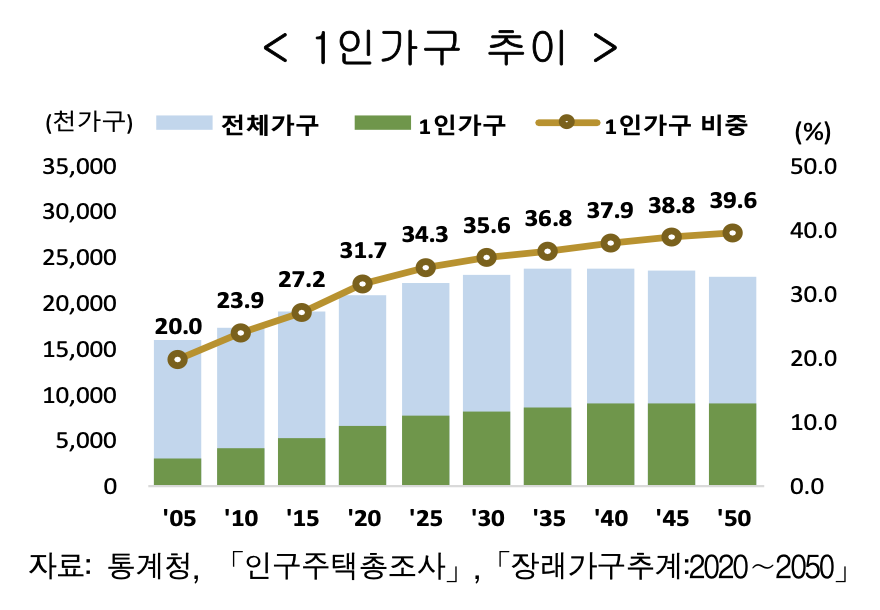

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/mini_project/자료/1인가구추이.png')

# **[ 2021년 전국 1인 가구 비중 ]**

#### 데이터 출처 - 통계청 KOSIS

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mini_project/자료/1인가구비율_시도_시_군_구.csv", encoding="cp949")

In [ ]:
# 2021년 1인 가구 데이터
df = df.drop([0], axis=0)
df

,행정구역별,2021
1,전국,33.4
2,서울특별시,36.8
3,부산광역시,34.0
4,대구광역시,32.7
5,인천광역시,30.0
6,광주광역시,34.5
7,대전광역시,37.6
8,울산광역시,29.5
9,세종특별자치시,31.5
10,경기도,29.2


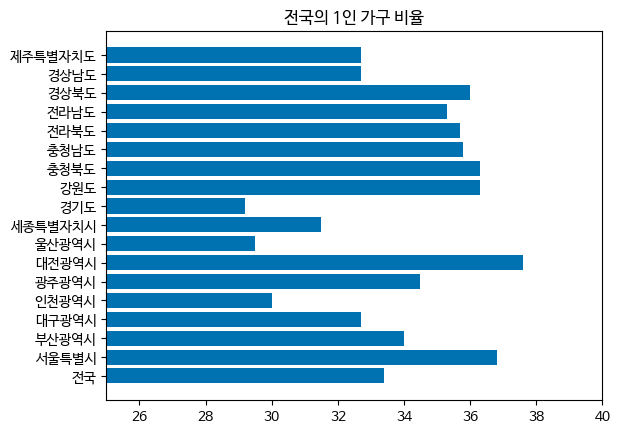

In [ ]:
x = df['행정구역별']
y = df['2021']
y2 = np.array(y).astype(float)
z = np.array([x,y])

plt.barh(x, y2)
plt.title('전국의 1인 가구 비율')

start_value = -1
end_value = max(y2) + 1
plt.xlim([25,40])

plt.show()

# **[ 전국 1인 가구 비중 분석결과 ]** 

## -  2021년 1인 가구는 **전국 33.4 %** , 1위 대전 37.6 %, 2위 서울 36.8 %  

---
# [ 1인 가구 분석 - 2021년 2022년 비교 ]

#### 데이터 출처 - 통계청 KOSIS

In [ ]:
dfnew = pd.read_csv("/content/drive/MyDrive/mini_project/자료/가구원수별 가구당 월평균 가계수지.csv", encoding="cp949")

In [ ]:
dfnew.head()

,가구원수별,가계수지항목별,2021.1/4,2021.1/4.1,2021.1/4.2,2021.2/4,2021.2/4.1,2021.2/4.2,2021.3/4,2021.3/4.1,...,2022.1/4.2,2022.2/4,2022.2/4.1,2022.2/4.2,2022.3/4,2022.3/4.1,2022.3/4.2,2022.4/4,2022.4/4.1,2022.4/4.2
0,가구원수별,가계수지항목별,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,...,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
1,전체 평균,가구원수 (명),2.37,2.49,2.22,2.37,2.48,2.21,2.37,2.47,...,2.18,2.33,2.43,2.18,2.33,2.43,2.17,2.33,2.44,2.16
2,전체 평균,가구주연령 (세),52.84,47.50,59.87,52.66,48.42,58.88,52.62,48.17,...,59.81,52.30,47.65,59.19,52.27,47.86,59.05,52.27,47.73,59.56
3,전체 평균,가구분포 (%),100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
4,전체 평균,소득,4383813,5290038,3192094,4286962,5012008,3220820,4728905,5460932,...,3629796,4831061,5279701,4165507,4868667,5510040,3881281,4833575,5464131,3822462


In [ ]:
df1b = dfnew.iloc[41:54, [1,2,5,8,11,14,17,20,23]] #1인 : 전체가구 지출
df1b

,가계수지항목별,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4
41,소비지출,1307699,1378178,1441962,1487754,1467065,1554627,1588645,1604836
42,01.식료품 · 비주류음료,186855,177443,210351,202720,192225,181874,204164,204409
43,02.주류 · 담배,29751,32349,35912,33630,33048,35436,38778,34121
44,03.의류 · 신발,58782,68043,57598,88010,65171,77954,74289,95285
45,04.주거 · 수도 · 광열,277387,253667,245082,262423,300210,266772,245575,277955
46,05.가정용품 · 가사서비스,54303,58416,65825,70295,58219,73734,60761,65872
47,06.보건,114573,122980,127952,118494,130408,125501,125486,130803
48,07.교통,114537,151121,167252,161881,160101,195529,193545,173640
49,08.통신,63084,61815,67646,67347,64005,61601,70783,74845
50,09.오락 · 문화,80734,92430,87218,95916,91751,114351,117375,112435


In [ ]:
df1_2021_s = df1b.iloc[:,1:5] #2021년도 분기별 지출
df1_2022_s = df1b.iloc[:,5:9] #2022년도 분기별 지출

In [ ]:
df1_2021_s['2021.1/4'] = pd.to_numeric(df1_2021_s['2021.1/4'])
df1_2021_s['2021.2/4'] = pd.to_numeric(df1_2021_s['2021.2/4'])
df1_2021_s['2021.3/4'] = pd.to_numeric(df1_2021_s['2021.3/4'])
df1_2021_s['2021.4/4'] = pd.to_numeric(df1_2021_s['2021.4/4'])

In [ ]:
df1_2022_s['2022.1/4'] = pd.to_numeric(df1_2022_s['2022.1/4'])
df1_2022_s['2022.2/4'] = pd.to_numeric(df1_2022_s['2022.2/4'])
df1_2022_s['2022.3/4'] = pd.to_numeric(df1_2022_s['2022.3/4'])
df1_2022_s['2022.4/4'] = pd.to_numeric(df1_2022_s['2022.4/4'])

## [ 2021년 _ 1인 가구 ]

In [ ]:
df1_2021_s.sum(axis=1)  # 2021 분야별 소비 총합
df1_2021_s.sum(axis=1).iloc[0] # 2021 전체 소비 총합

5615593

In [ ]:
df1_2021 = (df1_2021_s.sum(axis=1)/df1_2021_s.sum(axis=1).iloc[0]) * 100

In [ ]:
df1_percent1 = pd.DataFrame(df1_2021)

In [ ]:
df1_percent1.nlargest(5,0) #top5 분야 추출
df1_top1 = pd.concat([df1b.iloc[:,[0]], df1_percent1.nlargest(6,0)], axis=1)
df1_top1 = df1_top1.dropna()
df1_top1
df1_top1.set_index('가계수지항목별')

,0
가계수지항목별,
소비지출,100.00000
01.식료품 · 비주류음료,13.84304
04.주거 · 수도 · 광열,18.49420
06.보건,8.61884
07.교통,10.59178
11.음식 · 숙박,16.64579


## [ 2022년 _ 1인 가구 ]

In [ ]:
df1_2022_s.sum(axis=1)  # 2022 분야별 소비 총합
df1_2022_s.sum(axis=1).iloc[0] # 2022 전체 소비 총합

6215173

In [ ]:
df1_2022 = (df1_2022_s.sum(axis=1)/df1_2022_s.sum(axis=1).iloc[0]) * 100

In [ ]:
df1_percent2 = pd.DataFrame(df1_2022)

In [ ]:
df1_percent2.nlargest(5,0) #top5 분야 추출
df1_top2 = pd.concat([df1b.iloc[:,[0]], df1_percent2.nlargest(6,0)], axis=1)
df1_top2 = df1_top2.dropna()
df1_top2
df1_top2.set_index('가계수지항목별')

,0
가계수지항목별,
소비지출,100.00000
01.식료품 · 비주류음료,12.59292
04.주거 · 수도 · 광열,17.54596
06.보건,8.24109
07.교통,11.62985
11.음식 · 숙박,17.74559


In [ ]:
#컬럼명 설정
df1_top1.rename(columns = {0:'2021'}, inplace=True)
df1_top1

,가계수지항목별,2021
41,소비지출,100.00000
42,01.식료품 · 비주류음료,13.84304
45,04.주거 · 수도 · 광열,18.49420
47,06.보건,8.61884
48,07.교통,10.59178
52,11.음식 · 숙박,16.64579


In [ ]:
#컬럼명 설정
df1_top2.rename(columns = {0:'2022'}, inplace=True)
df1_top2

,가계수지항목별,2022
41,소비지출,100.00000
42,01.식료품 · 비주류음료,12.59292
45,04.주거 · 수도 · 광열,17.54596
47,06.보건,8.24109
48,07.교통,11.62985
52,11.음식 · 숙박,17.74559


In [ ]:
#2021년과 2022년 합치기
df1_sum = pd.concat([df1_top1, df1_top2.iloc[:,[1]]], axis = 1)

In [ ]:
#식료품 행 강조
#스타일을 변경할 함수 정의
def highlight_row_yellow(row):
    return ['background-color: yellow' for val in row]

#Styler 객체 생성
styled_df = df1_sum.style

#apply 메서드를 사용하여 스타일 적용
styled_df = styled_df.apply(highlight_row_yellow, axis=1, subset=pd.IndexSlice[[42], :])  # 42행의 스타일을 변경하는 함수 적용
styled_df

,가계수지항목별,2021,2022
41,소비지출,100.000000,100.000000
42,01.식료품 · 비주류음료,13.843044,12.592924
45,04.주거 · 수도 · 광열,18.494200,17.545964
47,06.보건,8.618840,8.241090
48,07.교통,10.591775,11.629845
52,11.음식 · 숙박,16.645793,17.745588


# **[ 2021년과 2022년의 1인가구 소비지출 항목 Top 5 비교 결과 ]** 

## **- 식료품 · 비주류음료 : - 1.25 % '감소'**

### - 주거 · 수도 · 광열 : -0.94 % '감소'

### - 보건 : -0.38 % '감소'

### - 교통 : 1.03 % '증가'

## **- 음식 · 숙박 : 1.1 % '증가'**

---
># **[ 🅰 1인 가구의 소비 패턴 분석 ]** 

## **1️⃣ 1인 가구는 최근 2년간 (21-22년) 어떤 소비패턴 보였을까? (1인 외 가구와 비교)**

## **→  코로나의 영향력이 점점 감소하는 시기** 

###- **음식/숙박**에 소비하는 비중이 전년대비 1.1% ~ 1.5% 가량 상승
###- **식료품 / 비주류음료**에 소비하는 비중은 전년대비 1.1% ~ 1.2% 가량 감소
###- 마스크 해제가 본격화 된 23년에는 이런 경향이 더욱 두드러질 것으로 예측


##→ 1인가구의 소비 카테고리 중 가장 큰 지출을 분석하는 것보다 **변화량**에 집중함

### *- 그 이유는 카테고리별 형성된 제품의 가격이 달라 일반화하기 어려움*


# [ 전체 가구 분석  - 2021년 2022년 비교 ]

#### 데이터 출처 - 통계청 KOSIS

In [ ]:
dfnew = pd.read_csv("/content/drive/MyDrive/mini_project/자료/가구원수별 가구당 월평균 가계수지.csv", encoding="cp949")

In [ ]:
df5b = dfnew.iloc[12:25, [1,2,5,8,11,14,17,20,23]] #1인 : 전체가구 지출
df5b

,가계수지항목별,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4
12,소비지출,2418703,2475079,2544163,2546841,2531308,2619402,2702345,2696830
13,01.식료품 · 비주류음료,384374,371261,430029,403521,387984,364574,406619,398961
14,02.주류 · 담배,36499,39512,42376,37811,36279,38346,42052,39413
15,03.의류 · 신발,106509,128920,105894,161273,112625,144980,122077,163875
16,04.주거 · 수도 · 광열,339681,305945,269469,279023,347599,295947,268742,295824
17,05.가정용품 · 가사서비스,118656,133004,140309,129290,106280,120479,127566,114446
18,06.보건,214730,234101,223178,233248,230818,239971,227314,231286
19,07.교통,270775,295996,287161,296148,278347,330965,311724,344681
20,08.통신,120094,118830,127767,128467,121676,123161,131373,134917
21,09.오락 · 문화,137391,147101,141510,143778,143824,176256,180949,172561


In [ ]:
df5_2021_s = df5b.iloc[:,1:5] #2021년도 분기별 지출
df5_2022_s = df5b.iloc[:,5:9] #2022년도 분기별 지출

In [ ]:
df5_2021_s['2021.1/4'] = pd.to_numeric(df5_2021_s['2021.1/4'])
df5_2021_s['2021.2/4'] = pd.to_numeric(df5_2021_s['2021.2/4'])
df5_2021_s['2021.3/4'] = pd.to_numeric(df5_2021_s['2021.3/4'])
df5_2021_s['2021.4/4'] = pd.to_numeric(df5_2021_s['2021.4/4'])

In [ ]:
df5_2022_s['2022.1/4'] = pd.to_numeric(df5_2022_s['2022.1/4'])
df5_2022_s['2022.2/4'] = pd.to_numeric(df5_2022_s['2022.2/4'])
df5_2022_s['2022.3/4'] = pd.to_numeric(df5_2022_s['2022.3/4'])
df5_2022_s['2022.4/4'] = pd.to_numeric(df5_2022_s['2022.4/4'])

# [ 2021년 전체가구 ]

In [ ]:
import pandas as pd

#지수표현식 없애기 
pd.options.display.float_format = '{:.5f}'.format


#되돌리기
# pd.reset_option('display.float_format')

In [ ]:
df5_2021_s.sum(axis=1) # 2021 분야별 소비 총합
df5_2021_s.sum(axis=1).iloc[0] # 2021 전체 소비 총합

In [ ]:
df5_2021 = (df5_2021_s.sum(axis=1)/df5_2021_s.sum(axis=1).iloc[0]) * 100

In [ ]:
df5_percent1 = pd.DataFrame(df5_2021)
df5_percent1

,0
12,100.00000
13,15.91606
14,1.56436
15,5.03362
16,11.95937
17,5.22053
18,9.06636
19,11.51832
20,4.95912
21,5.70648


In [ ]:
df5_percent1.nlargest(5,0) #top5 분야 추출
df5_top1 = pd.concat([df5b.iloc[:,[0]], df5_percent1.nlargest(6,0)], axis=1)
df5_top1 = df5_top1.dropna()
df5_top1
df5_top1.set_index('가계수지항목별')

,0
가계수지항목별,
소비지출,100.00000
01.식료품 · 비주류음료,15.91606
04.주거 · 수도 · 광열,11.95937
06.보건,9.06636
07.교통,11.51832
11.음식 · 숙박,13.52776


# [ 2022년 전체가구 ]

In [ ]:
df5_2022_s.sum(axis=1)  # 2022 분야별 소비 총합
df5_2022_s.sum(axis=1).iloc[0] # 2022 전체 소비 총합

In [ ]:
df5_2022 = (df5_2022_s.sum(axis=1)/df5_2022_s.sum(axis=1).iloc[0]) * 100

In [ ]:
df5_percent2 = pd.DataFrame(df5_2022)
df5_percent2

,0
12,100.00000
13,14.76924
14,1.47954
15,5.15226
16,11.45142
17,4.44338
18,8.80947
19,11.99745
20,4.84486
21,6.38481


In [ ]:
df5_percent2.nlargest(5,0) #top5 분야 추출
df5_top2 = pd.concat([df5b.iloc[:,[0]], df5_percent2.nlargest(6,0)], axis=1)
df5_top2 = df5_top2.dropna()
df5_top2
df5_top2.set_index('가계수지항목별')

,0
가계수지항목별,
소비지출,100.00000
01.식료품 · 비주류음료,14.76924
04.주거 · 수도 · 광열,11.45142
06.보건,8.80947
07.교통,11.99745
11.음식 · 숙박,15.01092


In [ ]:
#컬럼명 설정
df5_top1.rename(columns = {0:'2021'}, inplace=True)
df5_top1
df5_top2.rename(columns = {0:'2022'}, inplace=True)
df5_top2

,가계수지항목별,2022
12,소비지출,100.00000
13,01.식료품 · 비주류음료,14.76924
16,04.주거 · 수도 · 광열,11.45142
18,06.보건,8.80947
19,07.교통,11.99745
23,11.음식 · 숙박,15.01092


In [ ]:
#2021년과 2022년 합치기
df5_sum = pd.concat([df5_top1, df5_top2.iloc[:,[1]]], axis = 1)

In [ ]:
# 스타일을 변경할 함수 정의
def highlight_row_yellow(row):
    return ['background-color: yellow' for val in row]

# Styler 객체 생성
styled_df = df5_sum.style

# apply 메서드를 사용하여 스타일 적용
styled_df = styled_df.apply(highlight_row_yellow, axis=1, subset=pd.IndexSlice[[13], :])  # 13행의 스타일을 변경하는 함수 적용
styled_df

,가계수지항목별,2021,2022
12,소비지출,100.000000,100.000000
13,01.식료품 · 비주류음료,15.916065,14.769242
16,04.주거 · 수도 · 광열,11.959375,11.451423
18,06.보건,9.066364,8.809470
19,07.교통,11.518324,11.997448
23,11.음식 · 숙박,13.527761,15.010922


# **[ 2021년과 2022년의 '전체가구' 소비지출 항목 Top 5 비교 결과 ]**

### **- 식료품 · 비주류음료 : -1.15 % '감소'**

### - 주거 · 수도 · 광열 : -0.51 % '감소'

### - 보건 : -0.26 % '감소'

### - 교통 : 0.48 % '증가'

### **- 음식 · 숙박 : 1.48 % '증가'**

# **[ 2021년과 2022년의 전체가구와 1인가구 소비지출 항목 Top 5 분석 ]**

## **< 공통점 >**

### - 전체가구와 1인 가구 '모두' 소비지출 항목 Top 5 의 **증감( + , - ) 여부 동일**

### - **'식료품 · 비주류음료' 가 가장 큰 감소폭을 보임**

### - '음식 · 숙박' 이 가장 큰 증가폭을 보임

### *- 여행 산업과 음식 산업은 꾸준한 성장이 이어질 것*
### - ‘틈새시장’으로 보이는 곳은 **‘식료품/비주류’시장!**


># **[ 🅰 1인 가구의 소비 패턴 분석 ]** 

## **2️⃣ 1인 가구를 타겟으로 주목해야 할 소비 카테고리를 알아보고,  다가오는 여름의 히트 상품 예측**

##→ 식료품 분야에서 2021년 대비 2022년 1인 가구 소비지출이 가장 크게 감소, 
##23년도에는 이러한 경향이 더욱 두드러질 것으로 예측

## → 따라서 23년도 식료품 시장에서 1인 가구 목적으로 판매전략 수립 시 더 나은 결과를 위한 전략을 세워보려고 함

## **< 주목해야할 카테고리💡 - 식료품 >**
## - 판매량 순 :  1) 물  2) 가공식품  3) 간편식
## - 필수재인 물을 제외하고 **‘가공식품’** 중심으로 분석해보고자 함

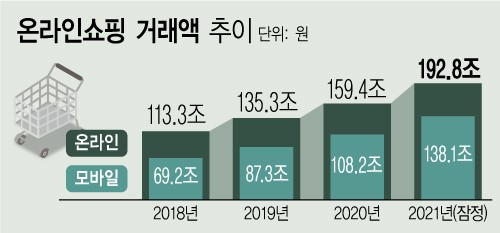

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/mini_project/자료/온라인구매이유.jpg')

># **[ 오프라인과 온라인 중에서 온라인 시장을 바라봐야 하는 이유 ]**

## - 통계청 조사결과, 온라인 쇼핑 거래액 **18년부터 21년까지 지속된 상승**

## - 20년에서 21년 사이 33조 4천억원의 큰 상승폭

## - 포스트 코로나시대 **간편/편리성 경향 증대**한 소비자 성향


---
> # [ 온라인으로 주로 구입하는 식품 분석 ] 
#### 데이터 출처 - 한국농촌경제연구원

In [ ]:
food21 = pd.read_excel("/content/drive/MyDrive/mini_project/자료/(data_가중) 2021 식품소비행태조사_주구입자.xlsx",sheet_name='Numeric')
food21

,vuid,urban,division,vs,H_ID,ID,stype21,HHFWT,area,No,...,P_BA3,P_BA4,P_BA5,P_BA6,P_BA7,P_BA8,P_BA9,P_BA10,P_BA11,P_BA12
0,e0037100122861,읍면,4,9,1I263101,1I26310101,A,3075.00572,37,109,...,1,1,4,4,2,2,2,3,1,3
1,e0037100122861,읍면,4,9,1I263102,1I26310201,A,4002.43001,37,110,...,1,1,4,4,2,2,2,7,1,1
2,e0037100552151,동,4,9,1I265101,1I26510101,A,4178.07253,37,111,...,1,2,4,4,2,2,2,3,1,4
3,e0037100552151,동,4,9,1I265102,1I26510201,A,9737.18942,37,112,...,2,2,4,4,1,1,1,1,1,2
4,e0037100552151,동,4,9,1I265103,1I26510301,A,6414.85884,37,113,...,1,1,3,3,2,2,2,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,e0011120510711,동,1,1,7A102502,7A10250201,A,6981.94011,11,3460,...,2,1,3,3,2,3,2,5,2,3
3314,e001122057007A,동,1,1,7A205508,7A20550801,A,5143.33272,11,3461,...,1,2,4,3,1,2,3,5,2,1
3315,e001122057007A,동,1,1,7A205509,7A20550901,A,4850.36059,11,3462,...,1,2,4,2,2,1,2,10,2,2
3316,e003116061092A,동,1,8,7H150501,7H15050101,A,15432.42340,31,3463,...,1,2,3,4,2,2,2,7,2,1


In [ ]:
new_food21 = food21[["SQ2","SQ33","SQ4","A4_4_1","A4_2","A4_3_1","A4_3_2","A4_3_3","A4_3_4","A4_3_5",
        "A4_3_6","A4_3_7","A4_3_8","A4_3_9","A4_3_10","A4_3_11","A7_1","A7_2"]]

new2_food21=new_food21[new_food21['SQ4'] == 1] # 1인가구데이터
new3_food21=new2_food21.dropna(subset='A4_2') # 온라인 구입여부
new3_food21

,SQ2,SQ33,SQ4,A4_4_1,A4_2,A4_3_1,A4_3_2,A4_3_3,A4_3_4,A4_3_5,A4_3_6,A4_3_7,A4_3_8,A4_3_9,A4_3_10,A4_3_11,A7_1,A7_2
22,1,53,1,4.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,7.00000,NaN,9.00000,NaN,NaN,2.00000,1.00000
60,2,65,1,2.00000,1.00000,NaN,2.00000,3.00000,NaN,NaN,6.00000,7.00000,NaN,NaN,NaN,NaN,1.00000,2.00000
63,2,27,1,2.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,7.00000,NaN,NaN,10.00000,NaN,6.00000,7.00000
74,2,62,1,2.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00000,NaN,2.00000,1.00000
76,2,45,1,2.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00000,NaN,2.00000,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,2,60,1,2.00000,2.00000,1.00000,NaN,NaN,NaN,NaN,NaN,7.00000,8.00000,9.00000,10.00000,NaN,1.00000,1.00000
3280,1,45,1,2.00000,2.00000,1.00000,NaN,NaN,NaN,NaN,NaN,7.00000,8.00000,NaN,NaN,NaN,2.00000,1.00000
3299,1,44,1,5.00000,2.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00000,NaN,NaN,1.00000,5.00000
3300,2,59,1,5.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00000,NaN,NaN,NaN,8.00000,2.00000


In [ ]:
new3_food21.info()

In [ ]:
pur = new3_food21.iloc[:,5:16] # 주로 구입하는 식품 인덱싱

pur2 = pur.count() # 각 컬럼별 NaN값 제외한 개수
pur3 = pur2.sort_values(ascending=False) # 내림차순으로 정렬
pur3

In [ ]:
pur4 = round(pur3.div(371)*100,2) # 이용자들이 어떤 물품을 구매했는지 비율로 변환 
df_pur = pur4.to_frame() # 데이터프레임 변환
df_pur
df_pur2 = df_pur.rename(index={'A4_3_1':'곡류','A4_3_2':'과일','A4_3_3':'채소','A4_3_4':'육류',
                      'A4_3_5':'계란류','A4_3_6':'수산물','A4_3_7':'물(생수/탄산수)','A4_3_8':'건강기능식품',
                      'A4_3_9':'가공식품(간편식 HMR제외)','A4_3_10':'간편식 HMR','A4_3_11':'기타'},columns={0:'구매 비율'}) # 보기 쉽게 각 인덱스와 컬럼의 이름 변경
df_pur2
# HMR은 Home Meal Replacement의 약어로, 가정에서 간편하게 먹을 수 있는 일종의 즉석식품

,구매 비율
물(생수/탄산수),60.92000
가공식품(간편식 HMR제외),54.99000
간편식 HMR,49.60000
건강기능식품,34.77000
곡류,33.42000
과일,26.42000
채소,13.75000
육류,12.94000
계란류,12.94000
수산물,8.36000


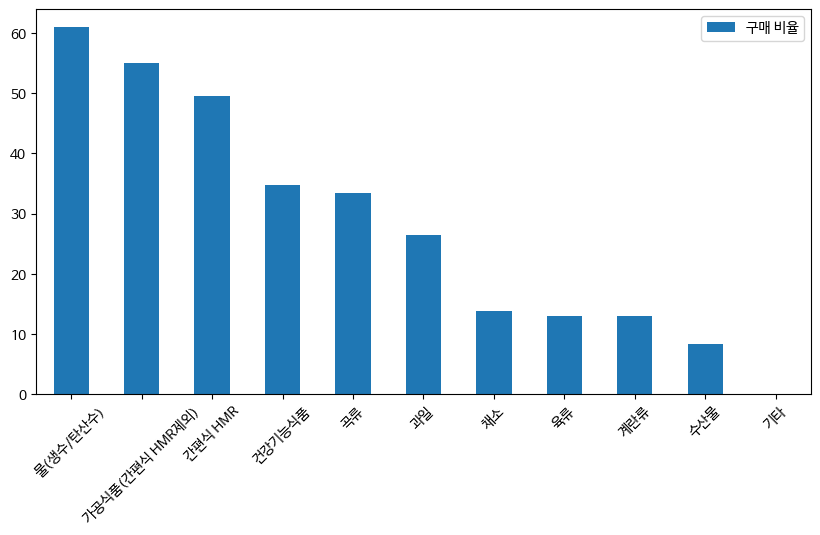

In [ ]:
df_pur2.plot.bar(figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

# **[ 1인가구가 온라인으로 주로 구입하는 상품 분석 ]** 


> ## 대체로 *물과 가공식품, 간편식 위주로 구입*

> ## 물은 필수재(가격이 오르거나 내려도 수요가 쉽게 변동하지 않는 특성이 있다) 이므로 **가공식품과 간편식 위주로 분석**


---
#  [ 온라인 마트 판매 데이터 ] 

- ## 실제 온라인 마트에서 판매되고 있는 품목의 현황 파악 (7월 ~ 9월 여름시즌)

#### 데이터 출처 - KADX 농식품 빅데이터 거래소

In [ ]:
df20 = pd.read_csv("/content/drive/MyDrive/mini_project/자료/TB_OLNE_TIME_PDLT_SALE_YMD_20221031.csv", encoding="utf-8")

df20.columns = ['확정일자','등록시분','식자재품목코드','식자재품목명','식자재품목대분류코드','식자재품목대분류명','식자재품목중분류코드','식자재품목중분류명',
                            '식자재품목소분류코드','식자재품목소분류명']

df20['확정일자'] = pd.to_numeric(df20['확정일자'])

df20

,확정일자,등록시분,식자재품목코드,식자재품목명,식자재품목대분류코드,식자재품목대분류명,식자재품목중분류코드,식자재품목중분류명,식자재품목소분류코드,식자재품목소분류명
0,20200912,08:08,3,감자,1002,농산물,2027,구근류,3065,감자
1,20200912,13:50,3,감자,1002,농산물,2027,구근류,3065,감자
2,20200912,11:07,3,감자,1002,농산물,2027,구근류,3065,감자
3,20200912,12:29,3,감자,1002,농산물,2027,구근류,3065,감자
4,20200912,13:20,3,감자,1002,농산물,2027,구근류,3065,감자
...,...,...,...,...,...,...,...,...,...,...
8928833,20220805,10:48,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928834,20220805,13:23,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928835,20220805,09:07,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928836,20220805,09:07,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부


In [ ]:
df21_7to9 =df20[(df20['확정일자'] >= 20210701) & (df20['확정일자'] <= 20210931)] # 2021년 7월부터 9월까지 데이터
df21_7to9

,확정일자,등록시분,식자재품목코드,식자재품목명,식자재품목대분류코드,식자재품목대분류명,식자재품목중분류코드,식자재품목중분류명,식자재품목소분류코드,식자재품목소분류명
1310,20210714,13:23,40,근대,1002,농산물,2092,엽경채류,3254,근대
1311,20210726,13:55,40,근대,1002,농산물,2092,엽경채류,3254,근대
1312,20210727,09:03,40,근대,1002,농산물,2092,엽경채류,3254,근대
1313,20210727,09:08,40,근대,1002,농산물,2092,엽경채류,3254,근대
1314,20210806,09:11,40,근대,1002,농산물,2092,엽경채류,3254,근대
...,...,...,...,...,...,...,...,...,...,...
8923360,20210929,08:03,91979,쥬키니호박,1002,농산물,2026,과채류,4454,애호박/쥬키니/풋호박
8923361,20210930,10:33,91979,쥬키니호박,1002,농산물,2026,과채류,4454,애호박/쥬키니/풋호박
8923362,20210930,13:27,91979,쥬키니호박,1002,농산물,2026,과채류,4454,애호박/쥬키니/풋호박
8923363,20210930,08:22,91979,쥬키니호박,1002,농산물,2026,과채류,4454,애호박/쥬키니/풋호박


In [ ]:
df22_7to9 =df20[(df20['확정일자'] >= 20220701) & (df20['확정일자'] <= 20220931)] # 2022년 7월부터 9월까지 데이터
df22_7to9

,확정일자,등록시분,식자재품목코드,식자재품목명,식자재품목대분류코드,식자재품목대분류명,식자재품목중분류코드,식자재품목중분류명,식자재품목소분류코드,식자재품목소분류명
974,20220701,08:42,40,근대,1002,농산물,2092,엽경채류,3254,근대
975,20220701,08:51,40,근대,1002,농산물,2092,엽경채류,3254,근대
976,20220701,09:09,40,근대,1002,농산물,2092,엽경채류,3254,근대
977,20220701,11:12,40,근대,1002,농산물,2092,엽경채류,3254,근대
978,20220701,14:33,40,근대,1002,농산물,2092,엽경채류,3254,근대
...,...,...,...,...,...,...,...,...,...,...
8928833,20220805,10:48,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928834,20220805,13:23,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928835,20220805,09:07,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928836,20220805,09:07,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부


In [ ]:
df21_7to9.value_counts("식자재품목대분류명")

식자재품목대분류명
가공상품    421508
농산물     343612
비식품      82848
수산물      36569
축산물      35886
dtype: int64

In [ ]:
df22_7to9.value_counts("식자재품목대분류명")

식자재품목대분류명
가공상품    531482
농산물     441595
비식품     104146
축산물      49680
수산물      45513
dtype: int64

## **[ 식자재품목대분류명 ]**

- ## 총 5가지 분류

### 1. 가공상품

### 2. 농산물

### 3. 비식품

### 4. 축산물

### 5. 수산물

In [ ]:
dff213 = df21_7to9[df21_7to9['식자재품목대분류명'] == '가공상품']  # 식자재품목대분류명이 '가공상품'인 데이터프레임
dff213

dff213['식자재품목중분류명'].value_counts()

dff213.drop_duplicates(['식자재품목중분류명']) # 식자재품목대분류명이 '가공상품' 일때, 식자재품목중분류명의 종류 (중복제거)

# dff213['식자재품목중분류명'].value_counts()  #대분류명이 '가공상품'일때 중분류별 종류별로 구입한 횟수
#dff213['식자재품목중분류명'].value_counts().sum()  #대분류명이 '가공상품'일때 중분류별 구입한 총 횟수
dff213_result = dff213['식자재품목중분류명'].value_counts()/dff213['식자재품목중분류명'].value_counts().sum()*100  # 대분류명이 '가공상품'일때 분류별로 구입한 퍼센트
dff213_result = pd.DataFrame(dff213_result)

In [ ]:
dff223 = df22_7to9[df22_7to9['식자재품목대분류명'] == '가공상품']  # 식자재품목대분류명이 '가공상품'인 데이터프레임
dff223

dff223.drop_duplicates(['식자재품목중분류명']) # 식자재품목대분류명이 '가공상품' 일때, 식자재품목중분류명의 종류 (중복제거)

# dff223['식자재품목중분류명'].value_counts()  #대분류명이 '가공상품'일때 중분류별 종류별로 구입한 횟수
#dff223['식자재품목중분류명'].value_counts().sum()  #대분류명이 '가공상품'일때 중분류별 구입한 총 횟수
dff223_result=dff223['식자재품목중분류명'].value_counts()/dff223['식자재품목중분류명'].value_counts().sum()*100  # 대분류명이 '가공상품'일때 분류별로 구입한 퍼센트
dff223_result = pd.DataFrame(dff223_result)

In [ ]:
pd.concat([dff213_result, dff223_result], axis = 1)

,식자재품목중분류명,식자재품목중분류명
반찬류,9.48025,9.76345
소스류,8.18300,8.17845
음료류,6.26678,6.12984
냉동식품,6.03595,6.37764
면류,5.77356,5.94752
분말류,5.70547,5.36067
조미료,5.62243,5.43367
육가공,5.42932,5.15972
수산가공,4.70691,4.78662
두부류,4.70643,5.53245


In [ ]:
dff223_sub = dff223_result.sub(dff213_result)
dff223_sub

dff223_r = dff223_sub.sort_values('식자재품목중분류명',ascending=False)
dff223_r2=dff223_r.iloc[0:6]
dff223_r2

,식자재품목중분류명
두부류,0.82602
냉동식품,0.34169
제과제빵,0.32324
반찬류,0.28321
면류,0.17396
편의식품,0.13131


<BarContainer object of 6 artists>

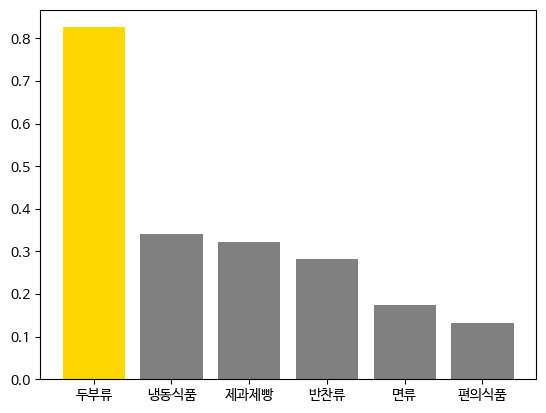

In [ ]:
x = np.array(['두부류','냉동식품','제과제빵','반찬류','면류','편의식품'])
y = np.array([0.826020,0.341691,0.323242,0.283207,0.173964,0.131308])
plt.xticks(rotation = 0)
plt.bar(x,y,color=['gold','gray','gray','gray','gray','gray'])

# **[ 2021년과 2022년의 여름시즌 '가공식품' 종류별 구입비율 분석 ]**


## - 가공식품 중에서 **'7-9월 시즌'** 가장 큰 상승률은 **‘두부류'**

## - *'냉동식품', '제과제빵', '편의식품'*  중에서 상승폭이 가장 큰 품목이 있을 것이라는 
## 예상과 전혀 동떨어진 결과


In [ ]:
# 가공상품 중 전년대비 판매량 상승률이 높은 TOP6 

dff224 = dff223[dff223['식자재품목중분류명'] ==  '두부류']
# dff224 = dff223[dff223['식자재품목중분류명'] ==  '냉동식품']
# dff224 = dff223[dff223['식자재품목중분류명'] ==  '제과제빵']
# dff224 = dff223[dff223['식자재품목중분류명'] ==  '반찬류']
# dff224 = dff223[dff223['식자재품목중분류명'] ==  '면류']
# dff224 = dff223[dff223['식자재품목중분류명'] ==  '편의식품']
dff224

#22년도 Top6 상품군

,확정일자,등록시분,식자재품목코드,식자재품목명,식자재품목대분류코드,식자재품목대분류명,식자재품목중분류코드,식자재품목중분류명,식자재품목소분류코드,식자재품목소분류명
59697,20220709,14:08,18931,냉동유부,1001,가공상품,2046,두부류,4662,유부
59698,20220728,13:36,18931,냉동유부,1001,가공상품,2046,두부류,4662,유부
59699,20220905,14:33,18931,냉동유부,1001,가공상품,2046,두부류,4662,유부
59700,20220917,13:48,18931,냉동유부,1001,가공상품,2046,두부류,4662,유부
100509,20220701,09:15,35847,시골손두부,1001,가공상품,2046,두부류,3538,두부
...,...,...,...,...,...,...,...,...,...,...
8928833,20220805,10:48,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928834,20220805,13:23,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928835,20220805,09:07,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부
8928836,20220805,09:07,96201,참살이순두부,1001,가공상품,2046,두부류,4286,순두부


In [ ]:
dff224.drop_duplicates(['식자재품목소분류명']) # 대분류명이 '가공상품'일때 식자재품목소분류명의 종류 (중복제거)

# dff224['식자재품목소분류명'].value_counts()  # 대분류명이 '가공상품'일때 소분류별 종류별로 구입한 횟수
#dff224['식자재품목소분류명'].value_counts().sum()  # 대분류명이 '가공상품'일때 소분류별 구입한 총 횟수
dff224_result=dff224['식자재품목소분류명'].value_counts()
dff224_result=pd.DataFrame(dff224_result)
dff224_result2=dff224['식자재품목소분류명'].value_counts()/dff224['식자재품목소분류명'].value_counts().sum()*100  # 대분류명이 '가공상품'일때 분류별로 구입한 퍼센트
dff224_result2 = pd.DataFrame(dff224_result2)
pd.concat([dff224_result,dff224_result2], axis=1)

,식자재품목소분류명,식자재품목소분류명
두부,19499,66.31411
순두부,5826,19.81363
유부,3293,11.19916
연두부,786,2.67311


In [ ]:
dff225 = dff224[dff224['식자재품목소분류명'] ==  '두부'] #두부류
# dff225 = dff224[dff224['식자재품목소분류명'] ==  '냉동감자'] #냉동식품
# dff225 = dff224[dff224['식자재품목소분류명'] ==  '과자류'] #제과제빵
# dff225 = dff224[dff224['식자재품목소분류명'] ==  '단무지/쌈무'] #반찬류
# dff225 = dff224[dff224['식자재품목소분류명'] ==  '김치류'] #반찬류
# dff225 = dff224[dff224['식자재품목소분류명'] ==  '우동면'] #면류
# dff225 = dff224[dff224['식자재품목소분류명'] ==  '즉석면류'] #편의식품

top5 = dff225['식자재품목명'].value_counts()/dff225['식자재품목명'].value_counts().sum()*100
df_top5 = top5.to_frame()
df_top5.iloc[0:5]

,식자재품목명
*반판두부,20.53951
콩이고소한두부,19.64716
시골손두부,16.76496
오늘맛반판두부,10.76978
단단한두부,6.87215


# **[ 2021년 대비 2022년 '두부류'가 큰 폭으로 상승한 원인 분석 ]**


https://www.notion.so/6-_-5-4-11-87a3669fe52c43cf826a7a7e4aab0893


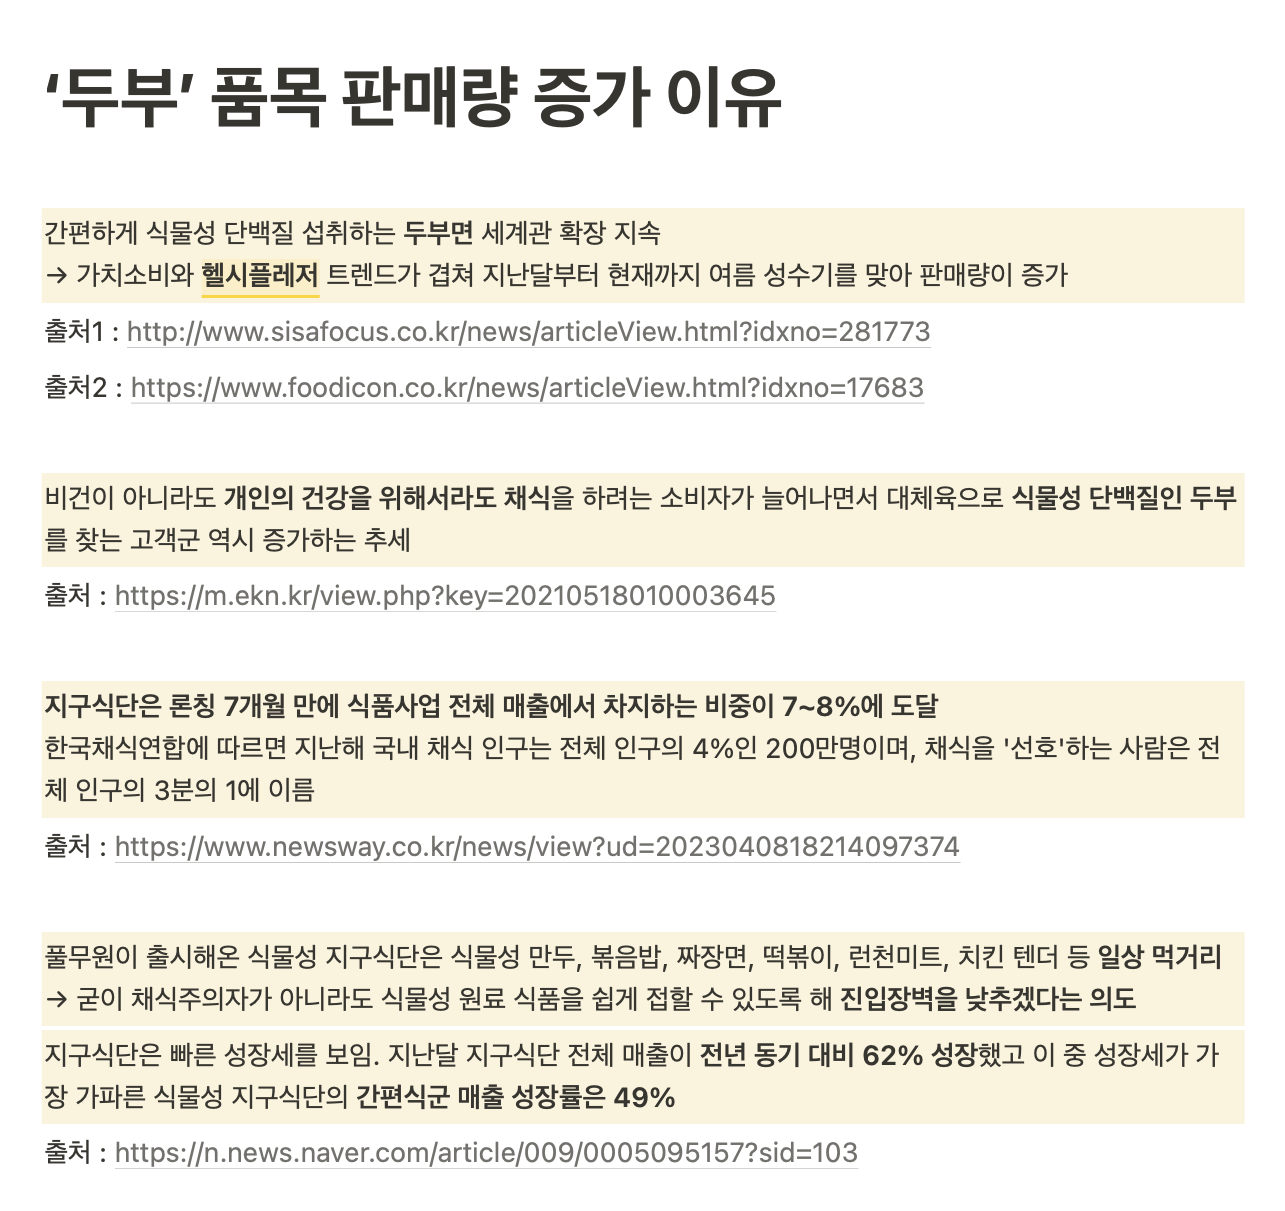

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/mini_project/자료/두부 증가 이유.png')

># **[ 🅰 1인 가구의 소비 패턴 분석 ]** 

## **3️⃣ 1인 가구가 온라인 소비로 가공식품을 구매하는 이유는?**

## → 1인 가구는 온라인으로 구입시에 *배달 가능여부와 가격, 품질, 다양성을 위주로 고려*

## → 가공식품의 경우 온라인으로 구매할 때 **맛, 품질, 신선도**를 중요시 여기며
##*이에 반해 영양은 크게 고려하지 않음*

## **< 추가 인사이트 >**
##- 구매 패턴을 살펴 보았을 때 **평일 밤**에 가장 많이 구매 (약 45%)
## - 배송의 정확성과 신속성이 가장 중요하며, 서비스 측면은 그보다는 후순위

---
# **[ 1인 가구(온라인 구매자) 설문응답 ]**

### 데이터 출처 - 한국농촌경제연구원
## - 2021년도 식품소비행태조사는 총 3,318가구
## - 가구주는 남성인 경우가 68.9%, 여성이 31.1%
## - 만 19세 이상 만 75세 이하 (식품주구입자)


* F1	F1. 가공식품 구입 빈도	주구입자 데이터
* F2_1	F2. 가공식품 구입 시 중요하게 고려하는 기준 (1순위)	주구입자 데이터
* F3_1	F3. 가공식품 구입 장소 (1순위)	주구입자 데이터
* F3_1_1	F3-1. 가공식품 구입 시 `주구입 장소`를 이용하는 이유 (1순위)	주구입자  데이터


In [ ]:
food21 = pd.read_excel("/content/drive/MyDrive/mini_project/자료/(data_가중) 2021 식품소비행태조사_주구입자.xlsx",sheet_name='Numeric')
food21


In [ ]:
pro_food21 = food21[["SQ4","A4_2","F1","F2_1","F2_2","F3_1","F3_2","F3_1_1","F3_1_2"]] #가공식품 데이터

pro2_food21=pro_food21[pro_food21['SQ4'] == 1] # 1인가구데이터
pro3_food21=pro2_food21.dropna(subset='A4_2') # 온라인 구입여부
pro3_food21, type(pro3_food21)

In [ ]:
pro3_food21.info()

In [ ]:
# 1인 가구는 가공식품을 일주일에 몇번이나 구매할까?

#가공식품을 구입하는 빈도
selected_col = pro3_food21['F1']

value_counts = selected_col.value_counts()  # 각 값의 빈도수 계산
total_count = selected_col.count()  # 전체 데이터 개수 계산
pro_fre_ratios = value_counts / total_count  # 각 값의 비율 계산

pro_fre_ratios

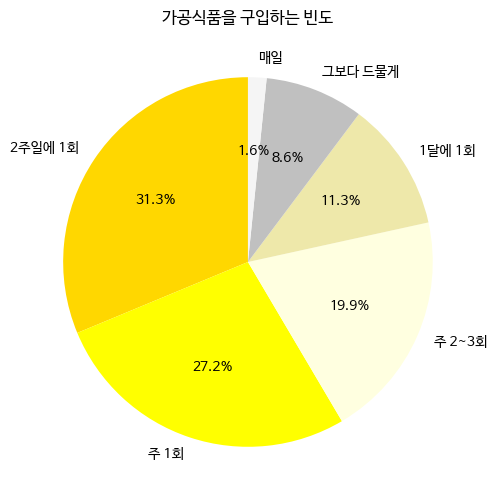

In [ ]:
#파이 차트로 시각화
import matplotlib.pyplot as plt

#순서 맞춰서 라벨 지정
label_names = ['2주일에 1회',
               '주 1회',
               '주 2~3회',
               '1달에 1회',
               '그보다 드물게',
               '매일'] 
#색 지정
colors = ['gold', 'yellow', 'lightyellow', 'palegoldenrod', 'silver', 'whitesmoke']
# 시각화
plt.figure(figsize=(6, 6))  # 차트의 크기 설정
plt.pie(pro_fre_ratios, labels=label_names, autopct='%1.1f%%', startangle=90,colors=colors)  # 파이 차트 생성
plt.title("가공식품을 구입하는 빈도")  # 차트 제목 설정
plt.show()  


# **[ 1인 가구가 온라인으로 가공식품을 구입하는 빈도 분석 ]**


> ## 보통 **2주에 한번 혹은 1주에 한번** 정도 온라인으로 가공식품을 구입하는 것으로 나타남 


In [ ]:
# 1인 가구는 가공식품을 구입할 때 가장 중요하게 무엇을 고려할까?

#가공식품을 구입할때 중요하게 생각하는 요소
selected_col2 = pro3_food21['F2_1']

value_counts2 = selected_col2.value_counts()  # 각 값의 빈도수 계산
total_count2 = selected_col2.count()  # 전체 데이터 개수 계산
pro_fre_ratios2 = value_counts2 / total_count2  # 각 값의 비율 계산

pro_fre_ratios2

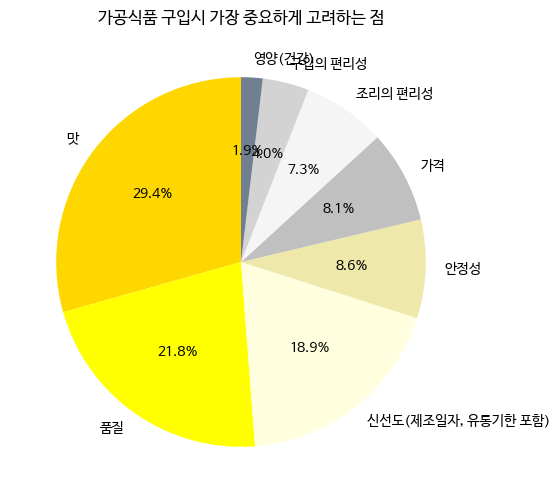

In [ ]:
#파이 차트로 시각화
import matplotlib.pyplot as plt

#순서 맞춰서 라벨링
label_names = ['맛',
               '품질',
               '신선도(제조일자, 유통기한 포함)',
               '안정성',
               '가격',
               '조리의 편리성',
               '구입의 편리성',
               '영양(건강)'] 

#색 지정
colors = ['gold', 'yellow', 'lightyellow', 'palegoldenrod', 'silver', 'whitesmoke', 'lightgray', 'slategray']

# 시각화
plt.figure(figsize=(6, 6))  # 차트의 크기 설정
plt.pie(pro_fre_ratios2, labels=label_names, autopct='%1.1f%%', startangle=90, colors = colors)  # 파이 차트 생성
plt.title("가공식품 구입시 가장 중요하게 고려하는 점")  # 차트 제목 설정
plt.show()  


# **[ 1인 가구가 온라인으로 가공식품을 구입 시에 가장 중요하게 고려하는 요소 분석 ]**


> ## 1인 가구는 '가공식품'을 온라인으로 구입시에 **맛, 품질, 신선도**를 중요시하며 
> ## 이와는 반대로 편리성과 영양적인 측면은 대체로 고려하지 않음

# [ 1인 가구(온라인 구매자) 설문응답 ]

#### 데이터 출처 - 한국농촌경제연구원

* A4_4_1 온라인을 통해 식품을 구입하는 이유 (1순위)	주구입자 데이터
* A4_5 주로 온라인 식품을 구매하는 시간대	주구입자 데이터
* A5 전년 대비 온라인을 통한 식품 구입 빈도 증감	주구입자 데이터
* A6_1 온라인을 통한 식품 구입 장소 (1순위)	주구입자 데이터
* A6_1_1 `주구입처`를 선택하게 된 이유 (1순위)	주구입자 데이터
* A7_1 온라인으로 식품 구입 시, 상품에 관계없이 가장 중요하게 고려하는 기준 (1순위) 주구입자 데이터

In [ ]:
food21_part3 = food21[["SQ2","SQ33","SQ4","A4_2","A4_4_1","A4_4_2","A4_5","A4_6_1",
                       "A4_6_2","A5","A6_1","A6_2","A6_1_1","A6_1_2","A7_1","A7_2"]]

food21_part3 = food21_part3[food21_part3['SQ4'] == 1] # 1인가구데이터
food21_part3 = food21_part3.dropna(subset='A4_2') # 온라인 구입여부
food21_part3

In [ ]:
#온라인을 통해 식품을 구입하는 이유
round(food21_part3['A4_4_1'].value_counts()/food21_part3['A4_4_1'].value_counts().sum()*100,2)

In [ ]:
#레이블에 대한 이름 매핑 딕셔너리
label_names_A4_4 = {1.0 : "좋은 품질", 2.0: "저렴한 가격", 3.0: "다양한 식품 구입 가능", 4.0: "배달 가능", 5.0: "상품 정보 비교, 확인 용이", 6.0: "시간 제약을 받지 않음", 7.0: "반품의 용이성"}

#데이터 프레임 생성
data_A4_4_1 = {'구매 이유':[4.0, 2.0, 1.0, 3.0, 6.0, 5.0, 7.0], '비율': [32.61, 25.07, 12.13, 11.32, 10.78, 7.55, 0.54]}
df_A4_4_1 = pd.DataFrame(data_A4_4_1)

#레이블에 대한 이름으로 변경
df_A4_4_1['구매 이유'] = df_A4_4_1['구매 이유'].replace(label_names_A4_4)

df_A4_4_1 = pd.DataFrame(df_A4_4_1)
df_A4_4_1

In [ ]:
#주로 온라인 식품을 구매하는 시간대
round(food21_part3['A4_5'].value_counts()/food21_part3['A4_5'].value_counts().sum()*100,2)

In [ ]:
#레이블에 대한 이름 매핑 딕셔너리
label_names_A4_5 = {1.0 : "평일 오전", 2.0 : "평일 오후", 3.0 : "평일 밤", 4.0: "주말 오전", 5.0: "주말 오후", 6.0: "주말 밤"}

#데이터 프레임 생성
data_A4_5 = {'구매 시간대':[3.0, 2.0, 5.0, 4.0, 6.0, 1.0], '비율': [44.74, 20.49, 16.71, 9.43, 7.01, 1.62]}
df_A4_5 = pd.DataFrame(data_A4_5)

#레이블에 대한 이름으로 변경
df_A4_5['구매 시간대'] = df_A4_5['구매 시간대'].replace(label_names_A4_5)

df_A4_5 = pd.DataFrame(df_A4_5)
df_A4_5

In [ ]:
# 1. 평일 오전(해가 뜰 때부터 정오까지)
# 2. 평일 오후(정오부터 해가 질 때까지)
# 3. 평일 밤(해가 지고 다음 날 해가 뜰 때까지)
# 4. 주말 오전(해가 뜰 때부터 정오까지)
# 5. 주말 오후(정오부터 해가 질 때까지)
# 6. 주말 밤(해가 지고 다음 날 해가 뜰 때까지)

In [ ]:
#전년 대비 온라인을 통한 식품 구입 빈도 증감
round(food21_part3['A5'].value_counts()/food21_part3['A5'].value_counts().sum()*100,2)

In [ ]:
#레이블에 대한 이름 매핑 딕셔너리
label_names_A5 = {1.0 : "매우 감소", 2.0 : "약간 감소", 3.0 : "변화 없음", 4.0: "약간 증가", 5.0: "매우 증가"}

#데이터 프레임 생성
data_A5 = {'전년 대비 구입 빈도':[3.0, 4.0, 5.0, 2.0], '비율': [48.52, 45.28, 4.31, 1.89]}
df_A5 = pd.DataFrame(data_A5)

#레이블에 대한 이름으로 변경
df_A5['전년 대비 구입 빈도'] = df_A5['전년 대비 구입 빈도'].replace(label_names_A5)

df_A5 = pd.DataFrame(df_A5)
df_A5

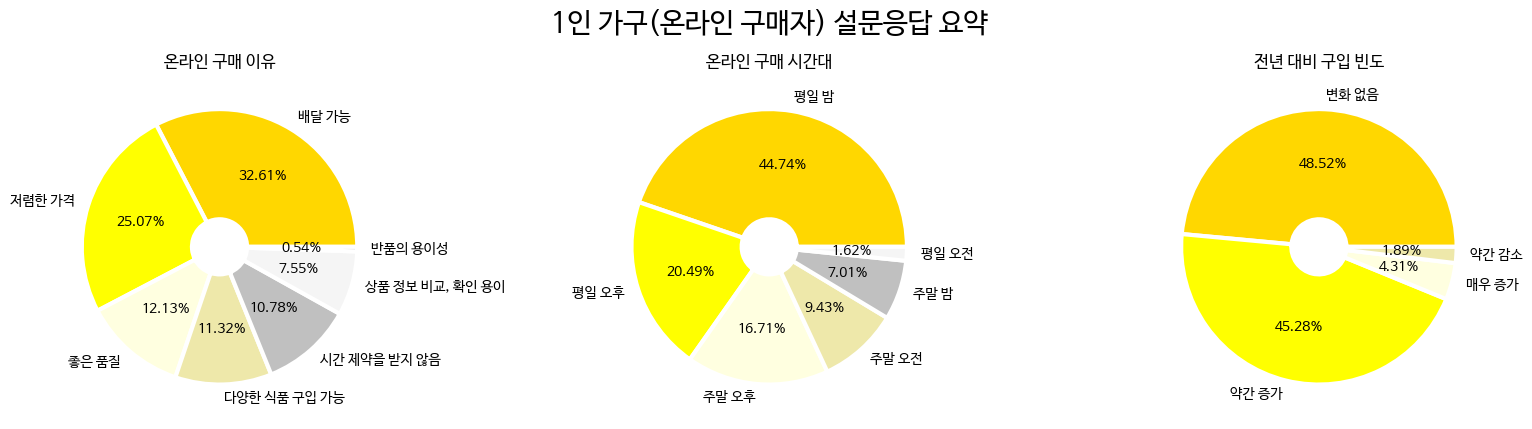

In [ ]:
#A4_4_1 ~ A7_1 그래프로 요약

fig = plt.figure(figsize=(16,8)) #그래프 사이즈 설정

#A4_4_1
x=np.array(df_A4_4_1['구매 이유'])
y=np.array(df_A4_4_1['비율'])
plt.subplot(2,3,1)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
colors = ['gold', 'yellow', 'lightyellow', 'palegoldenrod', 'silver', 'whitesmoke', 'lightgray']
plt.title('온라인 구매 이유')
plt.pie(y, labels=x, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)

#A4_5
x=np.array(df_A4_5['구매 시간대'])
y=np.array(df_A4_5['비율'])
plt.subplot(2,3,2)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
colors = ['gold', 'yellow', 'lightyellow', 'palegoldenrod', 'silver', 'whitesmoke']
plt.title('온라인 구매 시간대')
plt.pie(y, labels=x, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)

#A_5
x=np.array(df_A5['전년 대비 구입 빈도'])
y=np.array(df_A5['비율'])
plt.subplot(2,3,3)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}
colors = ['gold', 'yellow', 'lightyellow', 'palegoldenrod']
plt.title('전년 대비 구입 빈도')
plt.pie(y, labels=x, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)

fig.suptitle('1인 가구(온라인 구매자) 설문응답 요약', size = 20)
fig.tight_layout()
plt.show()

# **[ 1인가구의 온라인 구매 이유 ]**


# - 1인 가구는 온라인으로 구입시에 **배달과 가격, 품질, 다양성**을 위주로 고려

# **[ 1인가구의 주 온라인 구매 시간대 ]**


# - 1인 가구는 주로 **평일 밤**에 온라인 구매율이 높았고, 평일 오전에는 가장 낮게 나타남

# **[ 1인가구의 전년 대비 온라인 구입 빈도 ]**


# - 1인가구는 대체로 **전년 대비 비슷하거나 약간 증가한 정도**의 온라인 구입률을 보임

# [ 온라인으로 식품 구입 시에 상품에 관계없이 가장 중요하게 고려하는 기준 - 1순위 ]


 A7_1 온라인으로 식품 구입 시, 상품에 관계없이 가장 중요하게 고려하는 기준 (1순위)	주구입자 데이터

 A7_2 온라인으로 식품 구입 시, 상품에 관계없이 가장 중요하게 고려하는 기준 (2순위)	주구입자 데이터


In [ ]:
# 1. 배송의 정확성과 신속성 
# 2. 가격 
# 3. 프로모션 및 쿠폰 증정
# 4. 홈페이지/어플리케이션 구성 
# 5. 결제 시스템 
# 6. 평점 및 상품평
# 7. 제품 포장 상태 
# 8. 교환/환불 등 고객 서비스 
# 9. 기타(기록 :             )

In [ ]:
new_food21_firm = food21[["SQ2","SQ33","SQ4",'A4_2',"A7_1","A7_2","A7_1_1","A7_1_2","A7_1_3","A7_1_4","A7_1_5",
        "A7_1_6","A7_1_7","A8","A8_1","A8_2"]]

new_food21_firm1 = new_food21_firm[new_food21_firm['SQ4'] == 1] # 1인가구데이터
new_food21_firm2 = new_food21_firm1.dropna(subset='A4_2') # 온라인 구입여부

In [ ]:
new_food21_firm1_a7_1 = new_food21_firm1['A7_1'].value_counts()/new_food21_firm1['A7_1'].value_counts().sum()*100 
new_food21_firm1_a7_1

1.00000   46.36119
2.00000   27.76280
3.00000    9.97305
6.00000    7.00809
4.00000    4.04313
5.00000    2.69542
7.00000    1.34771
8.00000    0.80863
Name: A7_1, dtype: float64

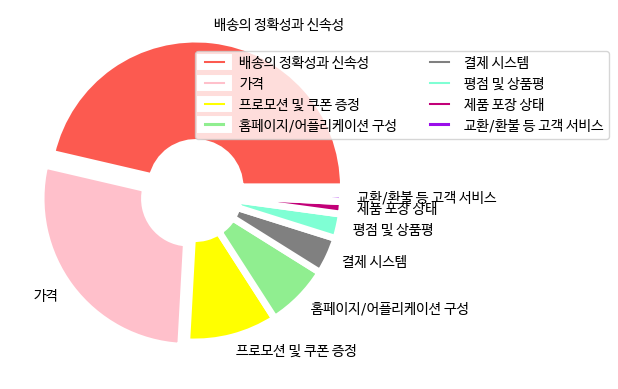

In [ ]:
import matplotlib.pyplot as plt

labels = ['배송의 정확성과 신속성 ', '가격', '프로모션 및 쿠폰 증정', '홈페이지/어플리케이션 구성', '결제 시스템','평점 및 상품평','제품 포장 상태','교환/환불 등 고객 서비스']
values = new_food21_firm1_a7_1.to_list()
explode = [0.05, 0.05,0,0,0,0,0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=labels, colors=['#FC5A50', '#FFC0CB', 'yellow', 'lightgreen','grey' ,'#7FFFD4','#C20078','#9A0EEA'],explode=explode,wedgeprops=wedgeprops)
plt.legend(loc=(0.5, 0.65),ncol=2)


plt.show()

# **[ 온라인으로 식품 구입 시에 상품에 관계없이 가장 중요하게 고려하는 기준 - 1순위 ]**

> # 온라인 식품 소비자들은 **가격보다는 배송의 정확성과 신속성**을 가장 중요하게 생각하며, *'서비스적인 측면은 그다지 고려하지 않는다'* 고 나타남

# [ 온라인으로 식품 구입 시에 상품에 관계없이 가장 중요하게 고려하는 기준 - 2순위 ]

In [ ]:
new_food21_firm1_a7_2 = new_food21_firm1['A7_2'].value_counts()/new_food21_firm1['A7_2'].value_counts().sum()*100 
new_food21_firm1_a7_2

2.00000   29.91914
1.00000   24.79784
6.00000   15.90296
3.00000   12.66846
5.00000    6.46900
7.00000    4.85175
4.00000    2.96496
8.00000    2.42588
Name: A7_2, dtype: float64

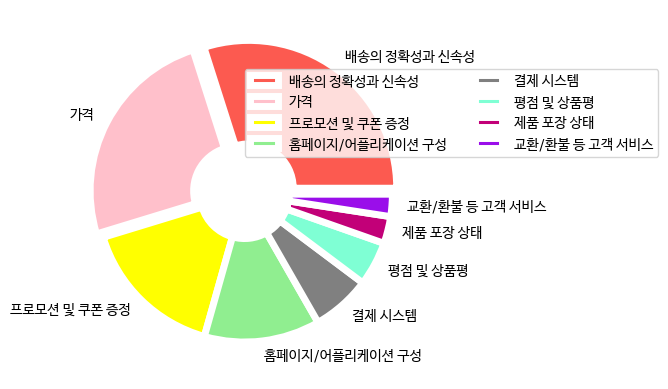

In [ ]:
import matplotlib.pyplot as plt

labels = ['배송의 정확성과 신속성 ', '가격', '프로모션 및 쿠폰 증정', '홈페이지/어플리케이션 구성', '결제 시스템','평점 및 상품평','제품 포장 상태','교환/환불 등 고객 서비스']
values = new_food21_firm1_a7_2.to_list()
explode = [0.05, 0.05,0,0,0,0,0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=labels, colors=['#FC5A50', '#FFC0CB', 'yellow', 'lightgreen','grey' ,'#7FFFD4','#C20078','#9A0EEA'],explode=explode,wedgeprops=wedgeprops)
plt.legend(loc=(0.5, 0.6),ncol=2)


plt.show()

# **[ 온라인으로 식품 구입 시에 상품에 관계없이 가장 중요하게 고려하는 기준 - 2순위 ]**


> # - 온라인 식품 소비자들은 **배송의 정확성과 신속성 그리고 가격**을 중요하게 생각
> # - 1순위에서는 46.36 % 정도였던 '배송의 정확성과 신속성'이 2순위에서는 29.92 %으로 **감소**
> # - 1순위에서는 9.97 % 정도였던 '프로모션 및 쿠폰 증정'이 2순위에서는 15.90 %으로 **상승**
> # - 1순위에서와 마찬가지로 *'서비스적인 측면은 그다지 고려하지 않는다'* 고 나타남

# [ 1인 가구(온라인 구매자) 설문응답 ]

#### 데이터 출처 - 한국농촌경제연구원


A7_1_1	온라인 식품 구입_(1) 나는 배송료를 절약하기 위해, 무료배송 상품을 찾아서 구입하거나  무료배송을 위해 더 많이 구입하는 편이다	주구입자 데이터

 A7_1_2	 온라인 식품 구입_(2) 나는 쿠폰할인을 받기 위해서 계획보다 더 많이 구입한다	주구입자 데이터

 A7_1_3	 온라인 식품 구입_(3) 나는 온라인으로 구입한 식품을 배송 받은 후 종종 박스 등 포장이 과하다고 느낀 적이 있다	주구입자 데이터

 A7_1_4	온라인 식품 구입_(4) 나는 온라인으로 구입한 식품을 오래도록 섭취하지 않아 유통기한의 경과, 변질 등으로 버린 적이 종종 있다	주구입자 데이터
 
 A7_1_5	온라인 식품 구입_(5) 나에게 온라인 쇼핑몰이 없다면, 식생활이 너무 불편해질 것 같다	주구입자 데이터

 A7_1_6 온라인 식품 구입_(6) 나는 온라인으로 식품을 구입할 때 한두가지 쇼핑몰만 이용하는 편이	주구입자 데이터

 A7_1_7 온라인 식품 구입_(7) 나는 온라인으로 식품을 구입할 때 유명한 식품 브랜드나 믿을만한 식품회사의 상품만 구입하는 편이다	주구입자 데이터

In [ ]:
# 1. 전혀 아니다
# 2. 아니다
# 3. 보통이다 
# 4. 그렇다
# 5. 매우 그렇다


new_food21_firm1_a7_1_1 = new_food21_firm1['A7_1_1'].value_counts()/new_food21_firm1['A7_1_1'].value_counts().sum()*100  # A7_1_1 응답 비율
new_food21_firm1_a7_1_2 = new_food21_firm1['A7_1_2'].value_counts()/new_food21_firm1['A7_1_2'].value_counts().sum()*100  # A7_1_2 응답 비율
new_food21_firm1_a7_1_3 = new_food21_firm1['A7_1_3'].value_counts()/new_food21_firm1['A7_1_3'].value_counts().sum()*100   # A7_1_3응답 비율
new_food21_firm1_a7_1_4 = new_food21_firm1['A7_1_4'].value_counts()/new_food21_firm1['A7_1_4'].value_counts().sum()*100   # A7_1_4 응답 비율
new_food21_firm1_a7_1_5 = new_food21_firm1['A7_1_5'].value_counts()/new_food21_firm1['A7_1_5'].value_counts().sum()*100   # A7_1_5 응답 비율
new_food21_firm1_a7_1_6 = new_food21_firm1['A7_1_6'].value_counts()/new_food21_firm1['A7_1_6'].value_counts().sum()*100   # A7_1_6 응답 비율
new_food21_firm1_a7_1_7 = new_food21_firm1['A7_1_7'].value_counts()/new_food21_firm1['A7_1_7'].value_counts().sum()*100   # A7_1_7 응답 비율

In [ ]:
pd.DataFrame(new_food21_firm1_a7_1_1)

In [ ]:
pd.DataFrame(new_food21_firm1_a7_1_2)

In [ ]:
pd.DataFrame(new_food21_firm1_a7_1_3)

In [ ]:
pd.DataFrame(new_food21_firm1_a7_1_4)

In [ ]:
pd.DataFrame(new_food21_firm1_a7_1_5)

In [ ]:
pd.DataFrame(new_food21_firm1_a7_1_6)

In [ ]:
pd.DataFrame(new_food21_firm1_a7_1_7)

# **[ 온라인 소비에 관한 1인가구 설문응답 분석 결과 - 소비자 ]**

##  1. 온라인 식품 구입 시에 **배송료를 절약하기 위해, 무료배송 상품을 구입하거나  무료배송을 위해 더 많이 구입**하는 편이다 

### - 54.17% '그렇다' 응답

## 2. **쿠폰할인**을 받기 위해서 *계획보다 더 많이 구입한다*

### - 39.35 % '보통이다' 응답

## 3. 온라인으로 구입한 식품을 배송 받은 후 종종 박스 등 **포장이 과하다**고 느낀 적이 있다

### - 40.16 % '그렇다' 응답

## 4. 온라인으로 구입한 식품을 오래도록 섭취하지 않아 **유통기한의 경과, 변질 등으로 버린 적**이 종종 있다

### - 44.47 % '그렇다' 응답

## 5. 온라인 쇼핑몰이 없다면, 식생활이 너무 **불편**해질 것 같다

### - 48.25 % '그렇다' 응답

## 6. 온라인으로 식품을 구입할 때 **한두가지 쇼핑몰만 이용**하는 편이다

### - 49.87 % '그렇다' 응답

## 7. 온라인으로 식품을 구입할 때 **유명한 식품 브랜드나 믿을만한 식품회사의 상품만 구입**하는 편이다

### - 54.99 % '그렇다' 응답

# [ 1인가구의 식품관련 온라인 구매 시 만족도 분석 ]

#### 데이터 출처 - 한국농촌경제연구원


 A8	A8. 온라인을 통한 식품 구입 만족도_가격 측면 만족도	주구입자 데이터

 A8_1	온라인을 통한 식품 구입 만족도_품질 측면 만족도	주구입자 데이터

 A8_2	온라인을 통한 식품 구입 전반적인 만족도	주구입자 데이터

In [ ]:
# 1. 매우 불만족
# 2. 불만족
# 3. 보통 
# 4. 만족
# 5. 매우 만족

new_food21_firm = food21[["SQ2","SQ33","SQ4",'A4_2',"A7_1","A7_2","A7_1_1","A7_1_2","A7_1_3","A7_1_4","A7_1_5",
        "A7_1_6","A7_1_7","A8","A8_1","A8_2"]]

new_food21_firm1 = new_food21_firm[new_food21_firm['SQ4'] == 1] # 1인가구데이터
new_food21_firm2 = new_food21_firm1.dropna(subset='A4_2') # 온라인 구입여부

In [ ]:
new_food21_firm1_a8 = new_food21_firm1['A8'].value_counts()/new_food21_firm1['A8'].value_counts().sum()*100  # A8 응답 비율
new_food21_firm1_a8_1 = new_food21_firm1['A8_1'].value_counts()/new_food21_firm1['A8_1'].value_counts().sum()*100  # A8 응답 비율
new_food21_firm1_a8_2 = new_food21_firm1['A8_2'].value_counts()/new_food21_firm1['A8_2'].value_counts().sum()*100  # A8 응답 비율

In [ ]:
pd.DataFrame(new_food21_firm1_a8)

In [ ]:
pd.DataFrame(new_food21_firm1_a8_1)

In [ ]:
pd.DataFrame(new_food21_firm1_a8_2)

# **[ 온라인 소비에 대한 소비자 만족도 ]**

> #  온라인을 통한 식품 구입에 대한 *가격, 품질, 전반적인 만족도*  
> # **70 % 이상 '만족'** 으로 나타남

># **[ ♈ 결론 ]**

## 1️⃣ **1인 가구의 최근 2년간 (21-22년) 소비패턴을 분석해본 결과**

##→ **가장 큰 성장을 보인 카테고리는 [ 음식/숙박 ]** 
##→ **반면 가장 큰 감소를 보인 카테고리는 [ 식료품/비주류 음료 ]**

### - 여행 산업과 음식 산업은 꾸준한 성장이 이어질 것
### - ‘틈새시장’으로 보이는 곳은 **‘식료품/비주류’시장!**

## 2️⃣ **1인 가구를 타겟으로 주목해야할 소비 카테고리는 [ 식료품/비주류 ]**

## → 판매량으로 보았을 때 1) 물, 2) 가공식품, 3) 간편식 순서

## - 필수제인 ‘물’ 제외로는 **가공식품과 간편식 우수**

## 3️⃣ **1인 가구가 온라인 소비로 가공식품을 구매하는 이유**

## → 1인 가구는 온라인으로 구입시에 **배달 가능여부와 가격, 품질, 다양성** 위주로 고려

## → 가공식품의 경우 온라인으로 구매할 때 **맛, 품질 신선도** 중요시 
## → 이에 반해 영양은 크게 고려하지 않음

# **[ ☝경쟁력 제고 방안 ]**

## 따라서 기업은, 1인가구를 타겟으로 할때 기업 경쟁력 제고를 위해

## **1️⃣ 틈새시장 ‘식료품/비주류’ 시장의 제품의 카테고리를 노려서 신제품이나, 기존 보유한 제품의 프로모션 진행**

## **2️⃣ 23년 여름시즌 ⛱️에는   ‘다이어트’와 관련된 [ 두부류 ] 의 제품이 좋은 판매로 이어질 것으로**
## **예상되므로, 제휴 혹은 자체 프로모션을 진행해 보는 것을 추천**

## **3️⃣ 1인 가구의 온라인 판매 특성을 고려하여 리뉴얼**

### 1. 무료배송 선택지 다양화
### 2. 상품 구입 가격대별 쿠폰 다양화 
### 3. 1인가구의 구매 시간대(평일 밤)을 고려한 프로모션 진행

# **[ 온라인 판매 특성을 고려하여 리뉴얼해야 할 사항 ]**

## **1️⃣ 무료배송 선택지 다양화**
### - 배송료를 절약하기 위해, 무료배송 상품을 구입하거나 무료배송을 위해 더 많이 구입하는 편이다 < 54.17% '그렇다' 응답 >
### - 무료배송 가능한 제품군을 다양화
### - 아파트 층이나 동별로 **묶음배송** (ex.배달의 민X)


## **2️⃣ 상품 구입 가격대별로 제공하는 쿠폰을 다양화하여 소비자의 추가 구매로 이어질 수 있도록** 
### - 2만원 이상 / 5만원 이상 구입 시 사용가능한 쿠폰
### - 2만원 이상 / 3만원 이상 / 4만원 이상 ... 구입 시 사용가능한 쿠폰

## **3️⃣ 포장에 관한 사항을 개선할 필요 有** 
### - 포장이 과하다고 여겨지는 소비자가 40 % 에 육박
### - **과대포장 줄이기**
### - 포장 사이즈에 맞는 **제품 용량 업그레이드** (ex. 포카X)

## **4️⃣ 1인가구의 온라인 구매패턴 고려 < 시간 >**
### - 1인 가구는 평일 밤에 가장 많이 구매하며 대체로 평일이나 주말 오후에도 구매하는 것으로 나타남
### - **평일과 주말 오후**에 온라인 팝업 광고 등을 활용하여 접근성 UP
### - 주로 **오후에 사용가능한 쿠폰이나 한정판매를 활용**하여 구매율 UP

